In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [22]:
x,y = make_moons(n_samples = 1000,noise = 0.2)

In [23]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}

In [24]:
dataset = pd.DataFrame(df)

In [25]:
dataset

,x1,x2,y
0,0.549155,-0.055350,1
1,0.604470,-0.269847,1
2,-0.017479,1.056211,0
3,-0.771440,0.836661,0
4,0.206400,-0.417832,1
...,...,...,...
995,0.038410,0.736933,0
996,-1.156482,0.495950,0
997,1.264276,0.597566,0
998,0.476271,1.121169,0


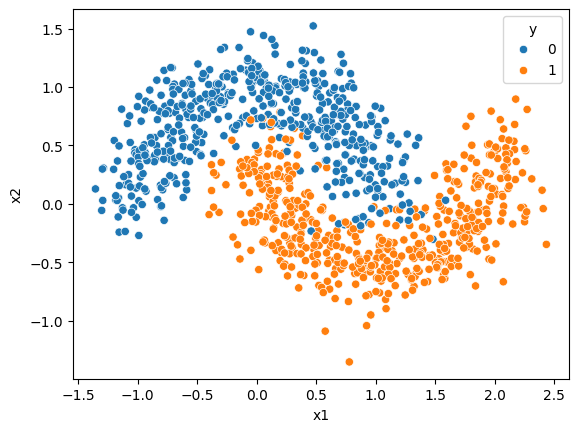

In [26]:
sns.scatterplot(data=dataset,x="x1",y="x2",hue="y")
plt.show()

In [28]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x_a,y_a,test_size = 0.2,random_state = 42)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [34]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(100.0, 94.5)

In [35]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(96.0, 94.5)

In [36]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100, dt.score(x_test,y_test)*100

(86.5, 94.5)

# Voting classifier model

In [38]:
from sklearn.ensemble import VotingClassifier

In [40]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [43]:
vc = VotingClassifier(li,weights=[5,4,7])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())],
                 weights=[5, 4, 7])

In [44]:
vc.score(x_train,y_train)*100,  vc.score(x_test,y_test)*100

(96.5, 95.5)

In [45]:
prd ={"dt":dt.predict(x_test),"svm":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [46]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
195,1,1,0,1
196,1,1,0,1
197,0,0,0,0
198,1,1,1,1
